### Perspective PS5 

#### 1. Mulitnomial Logistic Regression and Cross Validation

In [18]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# a).
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
drink = pd.read_csv("strongdrink.txt")
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
drink['cultivar'].unique()

array([1, 2, 3])

In [21]:
from sklearn.linear_model import LogisticRegression
X = drink[['alco', 'malic', 'tot_phen', 'color_int']]
y = drink['cultivar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
MultLogReg.fit(X_train, y_train)
y_pred = MultLogReg.predict(X_test)
print(classification_report(y_test, y_pred))
print (f'The error rate for j=1 is {1-0.87} and the error rate for j=2 is 0.')
print(f'Validation set MSE = {mean_squared_error(y_test, y_pred)}')

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

The error rate for j=1 is 0.13 and the error rate for j=2 is 0.
Validation set MSE = 0.045454545454545456


In [22]:
print('Estimated intercept for j=1:', MultLogReg.intercept_[0])
print('Estimated coefficients for j=1:', MultLogReg.coef_[0])
print()
print('Estimated intercept for j=2:', MultLogReg.intercept_[1])
print('Estimated coefficients for j=2:', MultLogReg.coef_[1])

Estimated intercept for j=1: -24.0112700999
Estimated coefficients for j=1: [ 1.70042653 -0.26560785  1.22389497  0.0227513 ]

Estimated intercept for j=2: 22.8020764886
Estimated coefficients for j=2: [-1.46801557 -0.33305179  0.66400739 -0.92271025]


In [23]:
MultLogReg.intercept_

array([-24.0112701 ,  22.80207649,   1.20919361])

According to the error rates reported above, the precision rates for cultivar 2 and 3 are the best, 1.00. The best predicted categories are not the categories with the most observations. The cultivar 3 only has 10 observations as opposed to 13 observations in cultivar 1. 


In [24]:
# b). leave-one-out cross validation 
from sklearn.model_selection import LeaveOneOut
N_loo = X.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(X)
MSE = pd.DataFrame({'index': np.zeros(N_loo), 
                    'error': np.zeros(N_loo), 
                    'y_pred': np.zeros(N_loo),
                    'y_test': np.zeros(N_loo)})

In [25]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    MultLogReg1 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    MultLogReg1.fit(X_train, y_train)
    y_pred = MultLogReg1.predict(X_test)
    MSE['index'][test_index] = test_index
    MSE['error'][test_index] = 1 - (1 if y_test.values[0] == y_pred[0] else 0)
    MSE['y_pred'][test_index] = y_pred
    MSE['y_test'][test_index] = y_test

error_1 = MSE[MSE['y_pred'] == 1]['error'].mean()
error_2 = MSE[MSE['y_pred'] == 2]['error'].mean()
error_3 = MSE[MSE['y_pred'] == 3]['error'].mean()    
    
print(classification_report(MSE['y_test'], MSE['y_pred'], digits =3))
print('The error rate for class 1 is', error_1, ', std is', MSE[MSE['y_pred'] == 1]['error'].std())
print('The error rate for class 2 is', error_2, ', std is', MSE[MSE['y_pred'] == 2]['error'].std())
print('The error rate for class 3 is', error_3, ', std is', MSE[MSE['y_pred'] == 3]['error'].std())

MSE_loo = MSE['error'].mean()
MSE_loo_std = MSE['error'].std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

             precision    recall  f1-score   support

        1.0      0.902     0.932     0.917        59
        2.0      0.914     0.901     0.908        71
        3.0      0.956     0.935     0.945        46

avg / total      0.921     0.920     0.921       176

The error rate for class 1 is 0.09836065573770492 , std is 0.3002730997379377
The error rate for class 2 is 0.08571428571428572 , std is 0.2819629507400967
The error rate for class 3 is 0.044444444444444446 , std is 0.20840907713999288
test estimate MSE loocv= 0.07954545454545454 , test estimate MSE standard err= 0.2713602101199873


The error rate of j=1 becomes smaller(from 0.13 to 0.098), but for j=2 and j=3, the error rates are bigger. The average MSE is also bigger in part b.

In [26]:
# c). k-fold cross-validation
from sklearn.model_selection import KFold
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(X)
MSE_vec_kf = np.zeros(k)
y_test_vec = np.array([])
y_pred_vec = np.array([])

k_ind = int(0)
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    y_test_vec = np.append(y_test_vec,y_test)    
    MultLogReg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    MultLogReg2.fit(X_train, y_train)
    y_pred = MultLogReg2.predict(X_test)
    y_pred_vec = np.append(y_pred_vec,y_pred)
    MSE_vec_kf[k_ind] = np.array([0 if y_test.values[i] == y_pred[i] else 1 for i in range(len(y_test))]).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

k index= 0
MSE for test set 0  is 0.159090909091
k index= 1
MSE for test set 1  is 0.113636363636
k index= 2
MSE for test set 2  is 0.0454545454545
k index= 3
MSE for test set 3  is 0.0454545454545
test estimate MSE k-fold= 0.0909090909091 test estimate MSE standard err= 0.04821182599


In [27]:
print(classification_report(y_test_vec, y_pred_vec))
print (f'the error rates for j=1,2,3 are 0.13, 0.09, 0.04 respectively.')

             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176

the error rates for j=1,2,3 are 0.13, 0.09, 0.04 respectively.


In general, the k-fold cross-validation behaves worse than LOO cross-validation, except that the error rate for class one remains the same, error rates for the other two groups are increased. 

### 2. Splines and interpolation

In [28]:
# a). scatter plot
cool = pd.read_csv("CoolIndex.txt", header= None, names =['age', 'coolness'])
cool.head()

,age,coolness
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


<IPython.core.display.Javascript object>


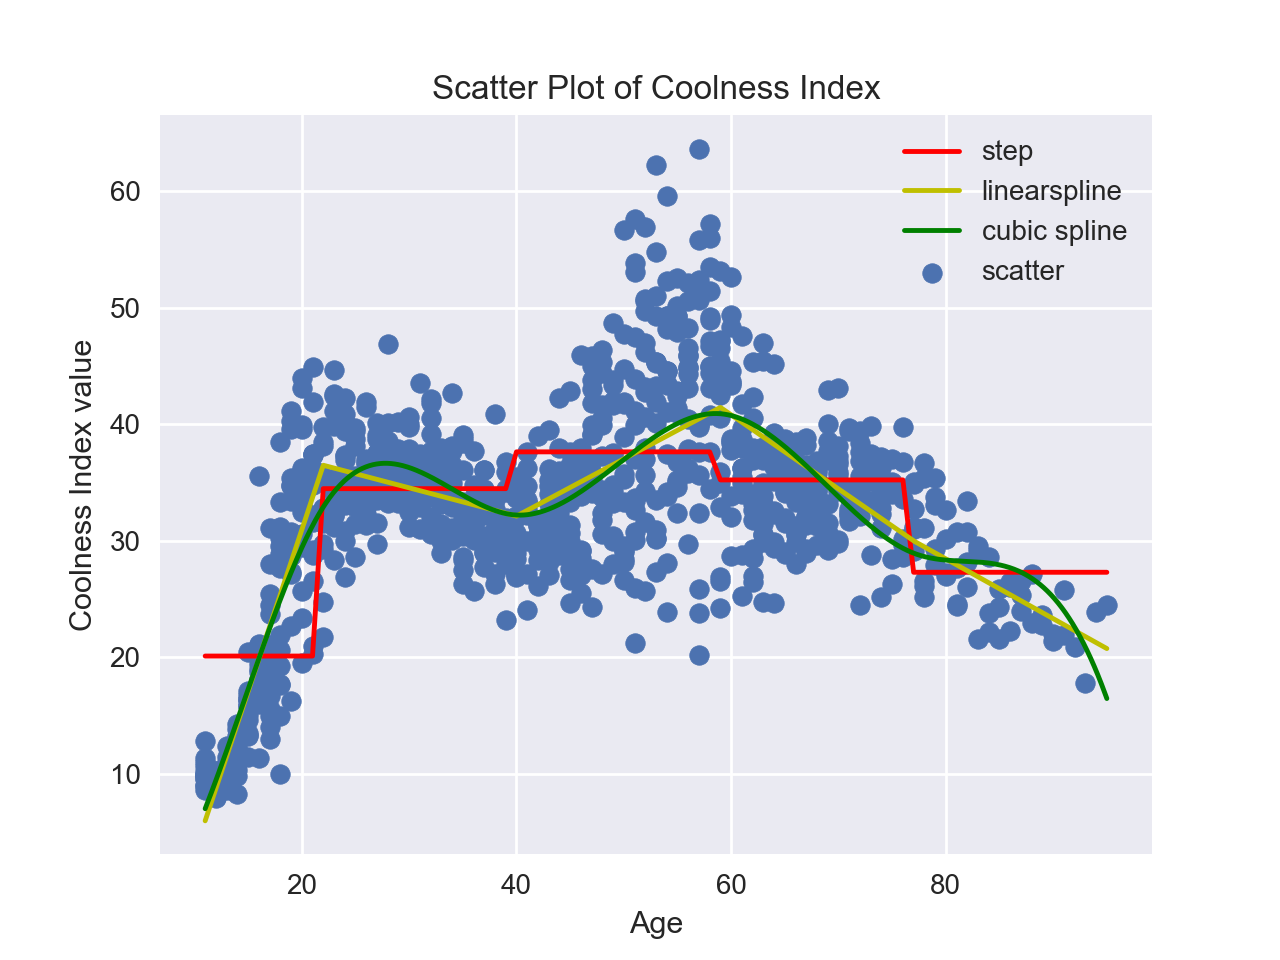

In [29]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
%matplotlib notebook
plt.scatter(cool.iloc[:, 0], cool.iloc[:, 1], label = 'scatter')
plt.title(r'Scatter Plot of Coolness Index')
plt.xlabel(r'Age')
plt.ylabel(r'Coolness Index value')
plt.legend()
plt.show()

In [13]:
max(cool.iloc[:,1])
min(cool.iloc[:,1])

7.9425151153015054

In [30]:
# b). OLS fit of a stepwise function
import statsmodels.api as sm
age = cool['age']
coolness = cool['coolness']
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age <= 95)).astype(int)
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
reg = sm.OLS(endog=coolness, exog=X_step, missing='drop')
reg_results = reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 18 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        23:32:32   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.562     35.746      0.0

In [31]:
y_pred = reg_results.predict(X_step)
plt.plot(cool.age, y_pred, color = 'r', label='step')
plt.legend()
plt.show()

b1, b2, b3, b4, b5 = reg_results.params
print('b1 =', b1, ', b2 =', b2,', b3 =', b3, ', b4 =', b4, ', b5 =', b5)
print('Predicted Coolness of a 73-year old is', reg_results.params[3])
reg_results.params

b1 = 20.1024572521 , b2 = 34.4757880776 , b3 = 37.6351054924 , b4 = 35.2254000402 , b5 = 27.2963782443
Predicted Coolness of a 73-year old is 35.2254000402


age_bin1    20.102457
age_bin2    34.475788
age_bin3    37.635105
age_bin4    35.225400
age_bin5    27.296378
dtype: float64

In [32]:
# c). fit a linearspline
from scipy.interpolate import LSQUnivariateSpline
knots = [22,40,59,77]
spl_linear = LSQUnivariateSpline(age.values, coolness.values, knots, k=1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.plot(age_vec, spl_linear(age_vec), 'y-', label = 'linearspline')
plt.legend()
plt.show()

predicted_age2 = spl_linear(73)
print('Predicted Coolness of a 73-year old is', predicted_age2)

Predicted Coolness of a 73-year old is 32.536832389143306


In [33]:
# d). fit a cubic spline 
knots = [22,40,59,77]
spl_cubic = LSQUnivariateSpline(age.values, coolness.values, knots, k=3)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.plot(age_vec, spl_cubic(age_vec), 'g-', label = 'cubic spline')
plt.legend()
plt.show()

predicted_age3 = spl_cubic(73)
print('Predicted Coolness of a 73-year old is', predicted_age3)

Predicted Coolness of a 73-year old is 31.262429389257864
